# Module - 4

# Random Forest Algorithm

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

Matplotlib is building the font cache; this may take a moment.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('demo1.csv')

In [4]:
df = data.dropna()

In [5]:
df.tail(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
14385,2021-07-09T03:35:17.580Z,38.492000,-119.532833,3.01,2.91,md,17.0,84.0,0.07526,0.06,...,2021-07-15T21:30:10.871Z,"31km ENE of Dardanelle, CA",earthquake,0.20,0.68,0.149,60.0,reviewed,nc,nc
14389,2021-07-09T03:30:32.250Z,33.693000,-116.788667,15.37,0.72,ml,37.0,61.0,0.06470,0.13,...,2021-07-09T14:27:23.887Z,"8km SW of Idyllwild, CA",earthquake,0.19,0.31,0.141,12.0,reviewed,ci,ci
14390,2021-07-09T03:26:18.980Z,38.452167,-119.474000,4.91,2.54,md,8.0,91.0,0.05915,0.02,...,2021-07-12T23:12:11.046Z,"30km NW of Bridgeport, CA",earthquake,0.85,1.63,0.239,44.0,reviewed,nc,nc
14396,2021-07-09T03:14:05.930Z,35.670167,-117.446667,9.67,0.87,ml,8.0,174.0,0.08444,0.15,...,2021-07-09T13:36:39.290Z,"12km SSW of Searles Valley, CA",earthquake,0.74,1.12,0.157,6.0,reviewed,ci,ci
14397,2021-07-09T03:11:24.990Z,38.497667,-119.544667,1.85,2.25,md,10.0,89.0,0.08380,0.04,...,2021-07-15T20:59:14.003Z,"30km NE of Dardanelle, CA",earthquake,0.30,1.26,0.074,11.0,reviewed,nc,nc
14398,2021-07-09T03:10:42.680Z,38.512833,-119.512000,4.72,2.55,md,13.0,104.0,0.05852,0.02,...,2021-07-12T23:06:13.015Z,"32km SE of Markleeville, CA",earthquake,0.23,0.74,0.091,26.0,reviewed,nc,nc
14399,2021-07-09T03:09:38.810Z,38.511000,-119.538000,1.40,2.52,md,15.0,98.0,0.07858,0.05,...,2021-07-15T20:44:11.626Z,"30km SE of Markleeville, CA",earthquake,0.26,1.06,0.194,27.0,reviewed,nc,nc
14402,2021-07-09T03:04:54.050Z,35.826000,-117.656000,9.66,0.33,ml,7.0,157.0,0.04863,0.07,...,2021-07-09T13:36:55.602Z,"23km N of Ridgecrest, CA",earthquake,0.39,0.89,0.113,4.0,reviewed,ci,ci
14403,2021-07-09T03:03:16.780Z,38.474833,-119.530167,3.50,1.91,md,13.0,72.0,0.07794,0.12,...,2021-07-15T20:14:10.957Z,"30km ENE of Dardanelle, CA",earthquake,0.26,1.01,0.217,12.0,reviewed,nc,nc
14405,2021-07-09T03:00:09.140Z,33.867500,-116.827667,13.10,0.89,ml,43.0,37.0,0.04219,0.13,...,2021-07-09T14:47:18.029Z,"7km SW of Cabazon, CA",earthquake,0.16,0.40,0.177,24.0,reviewed,ci,ci


In [6]:
del df['time']
del df['updated']
del df['place']
del df['net']
del df['magSource']
del df['type']
del df['id']

In [7]:
df.status.unique()

array(['automatic', 'reviewed'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['magType','status', 'locationSource']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [9]:
df.status.unique()

array([0, 1])

In [10]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='status', axis=1)
#Response variable
y = df.loc[:,'status']    

In [11]:
'''We'll use a test size of 20%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  5619
Number of test dataset:  1405
Total number of dataset:  7024


In [12]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc= RandomForestClassifier()

rfc.fit(X_train,y_train)

predictRF = rfc.predict(X_test)

print("")
print('Classification report of Random Forest Results:')
print("")
print(classification_report(y_test,predictRF))

print("")
cm1=confusion_matrix(y_test,predictRF)
print('Confusion Matrix result of Random Forest Classifier is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(rfc, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Random Forest Classifier is:",accuracy.mean() * 100)
RF=accuracy.mean() * 100

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.

Classification report of Random Forest Results:

              precision    recall  f1-score   support

           0       0.99      0.78      0.88       130
           1       0.98      1.00      0.99      1275

    accuracy                           0.98      1405
   macro avg       0.98      0.89      0.93      1405
weighted avg       0.98      0.98      0.98      1405


Confusion Matrix result of Random Forest Classifier is:
 [[ 102   28]
 [   1 1274]]

Sensitivity :  0.7846153846153846

Specificity :  0.9992156862745099

Cross validation test results of accuracy:
[0.93523132 0.94519573 0.9886121  0.97366548 0.97079772]

Accuracy result of Random Forest Classifier is: 96.27004694264481


In [14]:
def graph():
    import matplotlib.pyplot as plt
    data=[RF]
    alg="Random Forest Classifier"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("m"))
    plt.title("Accuracy comparison of Earth Quake",fontsize=15)
    plt.legend(b,data,fontsize=9)

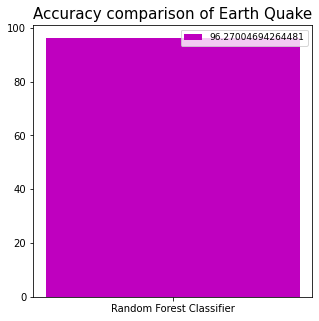

In [15]:
graph()

In [16]:
TP = cm1[0][0]
FP = cm1[1][0]
FN = cm1[1][1]
TN = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 102
True Negative : 28
False Positive : 1
False Negative : 1274

True Positive Rate : 0.07412790697674419
True Negative Rate : 0.9655172413793104
False Positive Rate : 0.034482758620689655
False Negative Rate : 0.9258720930232558

Positive Predictive Value : 0.9902912621359223
Negative predictive value : 0.021505376344086023


Confusion matrix-RandomForestClassifier:
[[ 102   28]
 [   1 1274]]


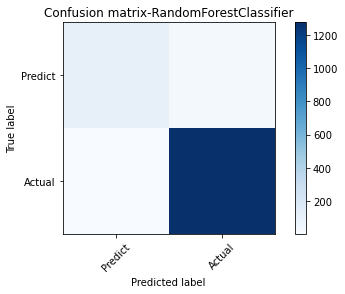

In [17]:
def plot_confusion_matrix(cm1, title='Confusion matrix-RandomForestClassifier', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm1=confusion_matrix(y_test, predictRF)
print('Confusion matrix-RandomForestClassifier:')
print(cm1)
plot_confusion_matrix(cm1)

# Creating pkl File

In [18]:
import joblib
joblib.dump(rfc,"rf.pkl")

['rf.pkl']